In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# First, download file from http://www.bast.de/videos/2016_A_S.zip
# Then read the text file.

import requests, zipfile, io

zip_file_url = "http://www.bast.de/videos/2016_A_S.zip"
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./2016_A_S.zip")

df_traffic = pd.read_csv(r'2016_A_S.txt', sep = ';')

# Extract required columns and translate column names to English
print(df_traffic)
df_traffic = df_traffic[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df_traffic.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']
df_traffic

         TKNR   Zst  Land Strklas  Strnum   Datum  Wotag Fahrtzw  Stunde  \
0        5329  4382    16       A      73  160101      5       s       1   
1        5329  4382    16       A      73  160101      5       s       2   
2        5329  4382    16       A      73  160101      5       s       3   
3        5329  4382    16       A      73  160101      5       s       4   
4        5329  4382    16       A      73  160101      5       s       5   
...       ...   ...   ...     ...     ...     ...    ...     ...     ...   
7273147  2130  1108     1       A       1  161231      6       u      20   
7273148  2130  1108     1       A       1  161231      6       u      21   
7273149  2130  1108     1       A       1  161231      6       u      22   
7273150  2130  1108     1       A       1  161231      6       u      23   
7273151  2130  1108     1       A       1  161231      6       u      24   

         KFZ_R1  ... Bus_R2  K_Bus_R2 LoA_R2  K_LoA_R2 Lzg_R2  K_Lzg_R2  \
0           

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,160101,1
1,4382,16,32,26,160101,2
2,4382,16,17,31,160101,3
3,4382,16,11,24,160101,4
4,4382,16,16,21,160101,5
...,...,...,...,...,...,...
7273147,1108,1,931,604,161231,20
7273148,1108,1,620,400,161231,21
7273149,1108,1,696,306,161231,22
7273150,1108,1,1103,297,161231,23


In [4]:
#### Answer 1

temp = df_traffic.copy()
temp.loc[temp.hour == 24, 'hour'] = 0
temp['date']=pd.to_datetime(temp['date'].astype(str)+ temp['hour'].astype(str), format='%y%m%d%H')


In [5]:
temp.head(10)

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16,10,2016-01-01 01:00:00,1
1,4382,16,32,26,2016-01-01 02:00:00,2
2,4382,16,17,31,2016-01-01 03:00:00,3
3,4382,16,11,24,2016-01-01 04:00:00,4
4,4382,16,16,21,2016-01-01 05:00:00,5
5,4382,16,15,25,2016-01-01 06:00:00,6
6,4382,16,21,21,2016-01-01 07:00:00,7
7,4382,16,11,10,2016-01-01 08:00:00,8
8,4382,16,22,22,2016-01-01 09:00:00,9
9,4382,16,40,39,2016-01-01 10:00:00,10


In [6]:
##Answer 2
df_sum = temp.copy()
df_sum
df_sum['sum'] = df_sum['cars_r1'] + df_sum['cars_r2']
df_byday_sum = df_sum.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()

#### My code here###

## Sorting the dataframe in the decreasing value order
df_byday_sum_sorted = df_byday_sum.sort_values(by=['sum'], ascending = False)
max_traffic = df_byday_sum_sorted.head(1)
print(max_traffic)
print("maximum traffic land")
print(max_traffic['land'])

      land       date       sum
2772     9 2016-07-29  18445463
maximum traffic land
2772    9
Name: land, dtype: int64


In [7]:
# Answer 3: Generate random indexes 
import random
import numpy as np

index = []
for x in range(1000):
    index.append(random.randint(1,3000000))
    
index = np.unique(index)
df_missing = temp.copy()
df_missing.loc[index,'cars_r1'] = np.nan
df_missing.loc[index,'cars_r2'] = np.nan


In [8]:
# When you print the dataframe you will notice that the values are set to NaN. 
print(df_missing.loc[index])

           nr  land  cars_r1  cars_r2                date  hour
5753     4382    16      NaN      NaN 2016-08-27 18:00:00    18
6579     4382    16      NaN      NaN 2016-10-01 04:00:00     4
8070     4382    16      NaN      NaN 2016-12-02 07:00:00     7
16920    4340    16      NaN      NaN 2016-12-05 01:00:00     1
27697    4342    16      NaN      NaN 2016-02-26 02:00:00     2
...       ...   ...      ...      ...                 ...   ...
2981331  9535     9      NaN      NaN 2016-05-28 04:00:00     4
2983274  9535     9      NaN      NaN 2016-08-17 03:00:00     3
2983427  9535     9      NaN      NaN 2016-08-23 12:00:00    12
2988001  9625     9      NaN      NaN 2016-03-01 02:00:00     2
2993837  9625     9      NaN      NaN 2016-10-30 06:00:00     6

[1000 rows x 6 columns]


In [9]:
# 3.1 In what conditions should NaN values be filled with mean and median? Please share your thoughts briefly.
## If the property being measured is not very skewed and has very few outliers then it is a good idea to replace 
## the NaN values with mean. 
## If the property being measured is very skewed and has many outliers then it is a good idea to replace 
## the NaN values with median.  So it basically depends on the which value is a better measure of the central tendency
## of the data.


In [10]:
#3.2 Write the code to drop the rows with missing values

df_drop_missing = df_missing.copy()
df_drop_missing.dropna()

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16.0,10.0,2016-01-01 01:00:00,1
1,4382,16,32.0,26.0,2016-01-01 02:00:00,2
2,4382,16,17.0,31.0,2016-01-01 03:00:00,3
3,4382,16,11.0,24.0,2016-01-01 04:00:00,4
4,4382,16,16.0,21.0,2016-01-01 05:00:00,5
...,...,...,...,...,...,...
7273147,1108,1,931.0,604.0,2016-12-31 20:00:00,20
7273148,1108,1,620.0,400.0,2016-12-31 21:00:00,21
7273149,1108,1,696.0,306.0,2016-12-31 22:00:00,22
7273150,1108,1,1103.0,297.0,2016-12-31 23:00:00,23


In [11]:
df_drop_missing

,nr,land,cars_r1,cars_r2,date,hour
0,4382,16,16.0,10.0,2016-01-01 01:00:00,1
1,4382,16,32.0,26.0,2016-01-01 02:00:00,2
2,4382,16,17.0,31.0,2016-01-01 03:00:00,3
3,4382,16,11.0,24.0,2016-01-01 04:00:00,4
4,4382,16,16.0,21.0,2016-01-01 05:00:00,5
...,...,...,...,...,...,...
7273147,1108,1,931.0,604.0,2016-12-31 20:00:00,20
7273148,1108,1,620.0,400.0,2016-12-31 21:00:00,21
7273149,1108,1,696.0,306.0,2016-12-31 22:00:00,22
7273150,1108,1,1103.0,297.0,2016-12-31 23:00:00,23


In [12]:
### 3.3 Fill the value with the previous timestamp value

df_fill_previous_timestamp = df_missing.copy()
df_fill_previous_timestamp['cars_r1'] = df_fill_previous_timestamp.cars_r1.fillna(method='ffill')
df_fill_previous_timestamp['cars_r2'] = df_fill_previous_timestamp.cars_r2.fillna(method='ffill') 
print(index)
print(df_fill_previous_timestamp.cars_r1[index])
print(df_fill_previous_timestamp.cars_r2[index])


[   5753    6579    8070   16920   27697   28214   34289   37219   42428
   42576   42697   48706   48812   49827   50311   51288   52244   53074
   53189   53236   57774   59162   63221   65276   65819   66039   71810
   73462   75502   79168   82921   91177   96315   96561   99577  101276
  108683  111268  116999  118969  119759  122118  127426  133129  134920
  136242  141142  147820  151132  156391  159323  163594  166034  166176
  168638  171660  172045  174218  182257  182448  188505  195746  196294
  196313  196474  203866  209403  210697  217683  220969  224619  228474
  234692  238187  241862  243824  244409  245760  247141  251558  253432
  259244  261840  266697  269371  276246  276950  277536  279800  280760
  286257  291603  293173  296618  298847  302020  306144  309664  311973
  313379  313633  314911  322069  325575  326498  329623  331924  337139
  338707  348329  349965  353564  357481  361127  363365  364606  368651
  373032  374412  377472  379224  384777  384856  3

In [13]:
### 3.4 Fill the value with a constant

df_fill_constant = df_missing.copy()
df_fill_constant.cars_r1 = df_fill_constant.cars_r1.fillna(0.0)
df_fill_constant.cars_r2 = df_fill_constant.cars_r2.fillna(0.0)

print(df_fill_constant['cars_r1'][index])
print(df_fill_constant['cars_r2'][index])

5753       0.0
6579       0.0
8070       0.0
16920      0.0
27697      0.0
          ... 
2981331    0.0
2983274    0.0
2983427    0.0
2988001    0.0
2993837    0.0
Name: cars_r1, Length: 1000, dtype: float64
5753       0.0
6579       0.0
8070       0.0
16920      0.0
27697      0.0
          ... 
2981331    0.0
2983274    0.0
2983427    0.0
2988001    0.0
2993837    0.0
Name: cars_r2, Length: 1000, dtype: float64


In [14]:
### 3.5 Fill the value with the mean of value above and below (time-wise) the datapoint

df_mean=df_missing.copy(deep=True)
df_mean.cars_r1 = (df_mean.cars_r1.ffill()+ df_mean.cars_r1.bfill())/2
df_mean.cars_r2 = (df_mean.cars_r2.ffill()+ df_mean.cars_r2.bfill())/2

'''df_mean=df_mean.sort_values(by=['date'])
df_mean.cars_r1 = df_mean.cars_r1.fillna((df_mean.cars_r1.shift() + df_mean.cars_r1.shift(-1))/2)
df_mean.cars_r2 = df_mean.cars_r2.fillna((df_mean.cars_r2.shift() + df_mean.cars_r2.shift(-1))/2)'''

print(df_mean.cars_r1[index])
print(df_mean.cars_r1[index-1])
print(df_mean.cars_r1[index+1])

print(df_mean.cars_r2[index])
print(df_mean.cars_r2[index-1])
print(df_mean.cars_r2[index+1])

5753        353.5
6579         62.5
8070        335.5
16920        62.0
27697        84.5
            ...  
2981331     136.0
2983274     114.0
2983427    1005.5
2988001      94.5
2993837     104.0
Name: cars_r1, Length: 1000, dtype: float64
5752       443.0
6578        52.0
8069       187.0
16919       88.0
27696      109.0
           ...  
2981330    133.0
2983273     99.0
2983426    943.0
2988000     85.0
2993836     60.0
Name: cars_r1, Length: 1000, dtype: float64
5754        264.0
6580         73.0
8071        484.0
16921        36.0
27698        60.0
            ...  
2981332     139.0
2983275     129.0
2983428    1068.0
2988002     104.0
2993838     148.0
Name: cars_r1, Length: 1000, dtype: float64
5753       413.5
6579        47.0
8070       402.5
16920       74.5
27697       79.5
           ...  
2981331    171.5
2983274    183.5
2983427    938.5
2988001    103.5
2993837     49.0
Name: cars_r2, Length: 1000, dtype: float64
5752       382.0
6578        41.0
8069       226.0
169

In [15]:

#Exercise 4 Plot the line chart to identify the number of cars_r1 and cars_r2 vs. date with different colors and legends.

df4= temp.copy()

grouped_by_name = df4.groupby(['nr'])
number = 4382
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.Grouper(freq = 'D')])[['cars_r1', 'cars_r2']].sum().reset_index()


#### your code here###

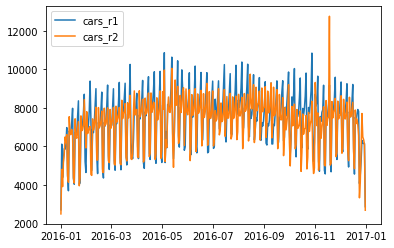

In [16]:
%matplotlib inline


plt.plot(station_days['date'], station_days['cars_r1'], label ='cars_r1')
plt.plot(station_days['date'], station_days['cars_r2'], label ='cars_r2')
plt.legend()
plt.show()

In [17]:
## ## Exercise 5: Plot the scatter plot for the top 3 busiest days per state
### Plot the different group of land vs. date and show the 3 busiest days using the below DataFrames generated.

df_scatter = temp.copy()
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending = False)
df_clean = df_sorted.groupby(['land']).head(3)

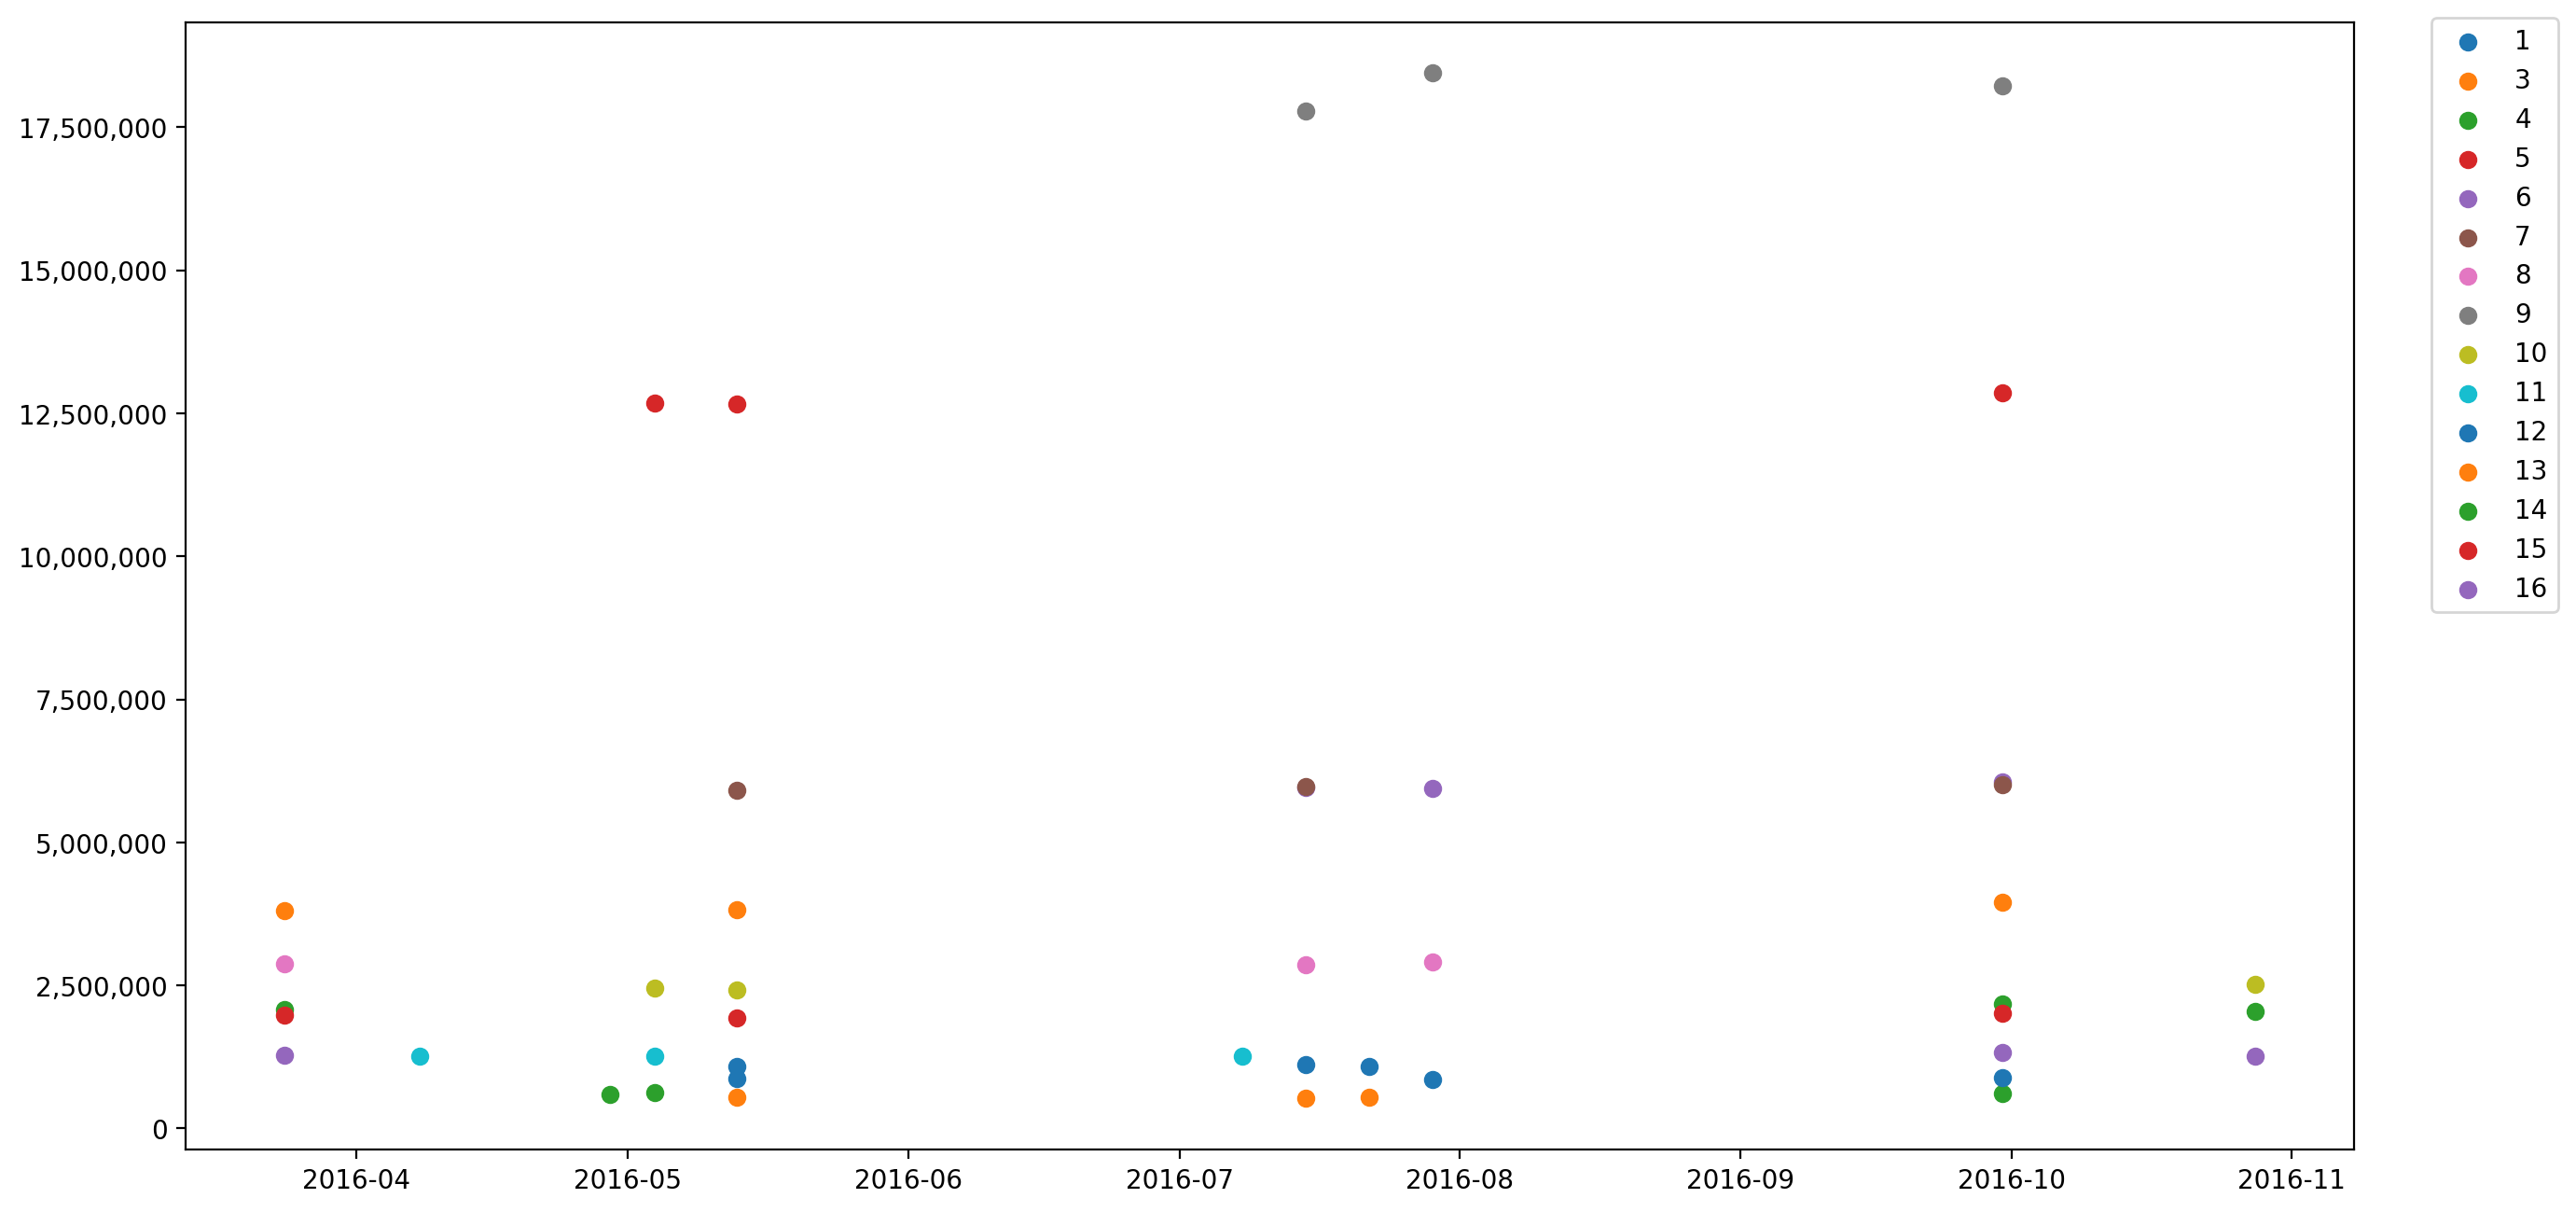

In [18]:
colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

groups = df_clean.groupby('land')

scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize = (15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    # ONE line to insert here for to plot.

    plt.scatter(group['date'], group['sum'], label = name)
    
    

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.015))
plt.show()